# Développer pour l'IA : computer vision avec Transfer Learning

Atelier du 23 juillet 2019 Google Atelier Numérique

Animé par [Romain Bardon](https://www.linkedin.com/in/romain-bardon/) (IAdvance) et [Nicolas Lecointe](https://www.linkedin.com/in/nicolaslecointe/) (Macaron Software)


Ce que l'on va utiliser : 
*   Librairies Tensorflow et Keras pour utiliser des réseaux de neurones.
*   Plusieurs jeux de données et modèles de réseaux de neurones existants.



## Fonctionnement du notebook

Un environnement d'execution dans une machine virtuelle / container, avec une interface Web pour interagir :

*   Presentation (MarkDown)
*   Code Source : ici Python
*   Terminal

cf. [Jupyter notebook](https://jupyter.org/) 
Essayer Jupyter sous différentes formes : [classique, jupyter lab, C++, R, Julia, Ruby, Scheme.](https://jupyter.org/try)

Les [commandes de bases](https://jupyter.org/documentation) (Documentation)

Dans le menu : Execution > Modifier le type d'execution


*   Type d'execution : Python 3
*   Accélérateur matériel : GPU

[GPU Tesla T4](https://www.nvidia.com/fr-fr/data-center/tesla-t4/)




In [0]:
!uname -a


Linux e1267c0c817d 4.14.79+ #1 SMP Wed Dec 19 21:19:13 PST 2018 x86_64 x86_64 x86_64 GNU/Linux
/bin/bash: lshw: command not found


In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3840448146836889784, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5913721146716334838
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8756425022206068439
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14892338381
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3921534775559352931
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

## La convolution et le transfer learning

Voici ce qu'un réseau de convolution apprend et "voit":

https://miro.medium.com/max/1400/1*jPCEik198_CjtmSL2H6o4g.png
<img src="Im1.png" style="width:600px;height:300px;">

Les couches initiales du réseau apprennent à détecter les formes et contours simples. La complexité des éléments qu'apprend le réseau augmente au fur et à mesure que l'on avance dans les couches successives.

On peut donc en théorie (et en pratique!) utiliser un réseau ayant été entraîné sur un jeu de données et le réutiliser sur d'autres données pour répondre à une autre problématique. En effet, si les couches finales du réseau détectent des éléments très différents de notre problématique, on peut se servir d'une bonne partie du réseau qui lui détecte des formes plus ou moins génériques.

Ceci a deux avantages:
1. Partir d'un modèle déjà pré-entraîné avec de très nombreuses données et avec des capacités de calculs énormes (dont nous ne disponsons généralement pas). Ces modèles existent et ont généralement été entraînés sur des jeux de données de références (comme ImageNet)
2. Cette approche réduit considérablement le nombre d'image nécessaires pour notre nouveau problème, car il ne reste plus qu'à "spécialiser" le réseau à notre nouveau problème

## Etape 0 : import des différentes librairies

In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import initializers

#CODE A COMPLETER

#importer la librairie Keras pour se servir du réseau ResNet. Documentation sur le site de Keras
from tensorflow.python.keras.applications import ResNet50

# FIN

from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np

import os
os.environ['PYTHONHASHSEED']=str(1)


tf.set_random_seed(1234)
np.random.seed(1)

# Exercice 1 - Rural / Urbain

## Etape 1: importer les données

In [0]:
!git clone https://github.com/rbardon/atelier.git

Cloning into 'atelier'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 34 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (34/34), done.


In [0]:
%cd ./atelier/ex1 - urban & rural

!unzip rural_and_urban_photos

/content/atelier/ex1 - urban & rural
Archive:  rural_and_urban_photos.zip
   creating: train/
  inflating: train/.DS_Store         
   creating: __MACOSX/
   creating: __MACOSX/train/
  inflating: __MACOSX/train/._.DS_Store  
   creating: train/rural/
  inflating: train/rural/.DS_Store   
   creating: __MACOSX/train/rural/
  inflating: __MACOSX/train/rural/._.DS_Store  
  inflating: train/rural/rural1.jpeg  
  inflating: __MACOSX/train/rural/._rural1.jpeg  
  inflating: train/rural/rural11.jpeg  
  inflating: __MACOSX/train/rural/._rural11.jpeg  
  inflating: train/rural/rural12.jpeg  
  inflating: __MACOSX/train/rural/._rural12.jpeg  
  inflating: train/rural/rural13.jpeg  
  inflating: __MACOSX/train/rural/._rural13.jpeg  
  inflating: train/rural/rural14.jpeg  
  inflating: __MACOSX/train/rural/._rural14.jpeg  
  inflating: train/rural/rural16.jpeg  
  inflating: __MACOSX/train/rural/._rural16.jpeg  
  inflating: train/rural/rural17.jpeg  
  inflating: __MACOSX/train/rural/._rural17

## Etape 2: visualiser les données

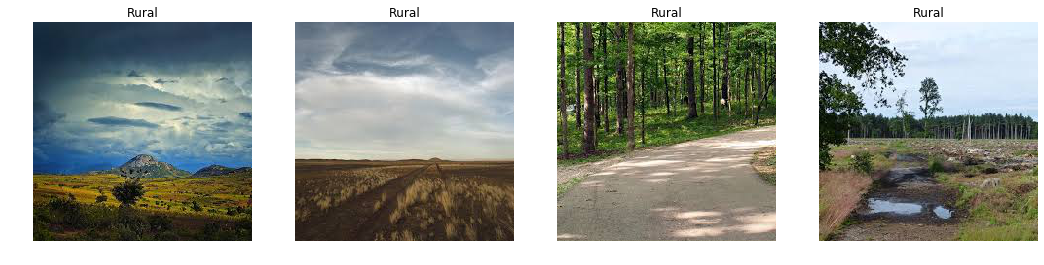

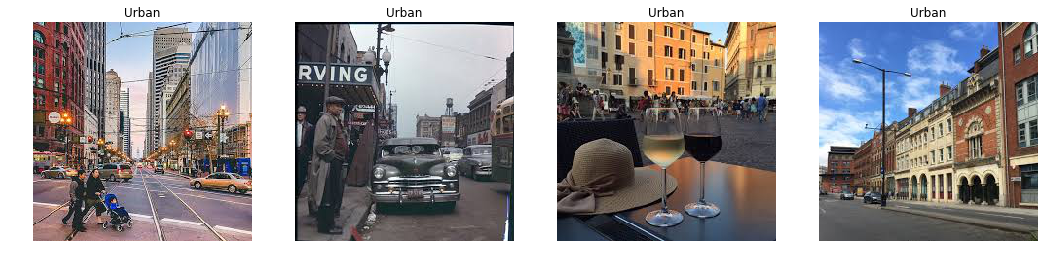

In [0]:
im_liste_rural = [1, 14, 26, 39]
im_liste_urban = [11, 24, 36, 43]


#pour voir les données de type "rural"
plt.figure(figsize=(18,18))
for i in range(0,4):
  plt.subplot(1,4,i+1)
  plt.imshow(mpimg.imread('./train/rural/rural' + str(im_liste_rural[i]) + '.jpeg'))
  plt.title('Rural')
  plt.axis('off')
  
#pour voir les données de type "urban"
plt.figure(figsize=(18,18))  
for i in range(0,4):
  plt.subplot(1,4,i+1)
  plt.imshow(mpimg.imread('./train/urban/urban_' + str(im_liste_urban[i]) + '.jpeg'))
  plt.title('Urban')
  plt.axis('off')

## Etape 3: un premier modèle avec convolution
Reseau de neurone convolutionnel ou convNet ou CNN

Pour en apprendre plus sur l'utilisation classique des filtres : [https://perso.esiee.fr/~perretb/I5FM/TAI/convolution/index.html](https://perso.esiee.fr/~perretb/I5FM/TAI/convolution/index.html)

et de leur utilisation en Deep Learning : [A guide to convolution arithmetic for deep learning
](https://arxiv.org/abs/1603.07285)

![Convolution : exemple de calcul](https://perso.esiee.fr/~perretb/I5FM/TAI/_images/conv2.png)
![Un exemple de convolution](https://github.com/vdumoulin/conv_arithmetic/blob/master/gif/same_padding_no_strides.gif?raw=true)
source : [https://github.com/vdumoulin/conv_arithmetic](https://github.com/vdumoulin/conv_arithmetic)

"kernel/noyau", "step" ou "stride/decallage", "padding", "dilated (kernel)", "transposed" => upsample

In [0]:
#les paramètres de base
image_size = 224
num_classes = 2
batch_size_ex1 = 24

In [0]:
#nous allons utiliser un générateur

data_generator_ex1b = ImageDataGenerator(rescale=1/255)

train_generator_ex1b = data_generator_ex1b.flow_from_directory(
        'train',
        target_size=(image_size, image_size),
        batch_size=batch_size_ex1,
        class_mode='categorical',
        seed = 1,
        shuffle = False)

validation_generator_ex1b = data_generator_ex1b.flow_from_directory(
        'val',
        target_size=(image_size, image_size),
        class_mode='categorical',
        seed = 1,
        shuffle = False)

Found 72 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [0]:
# un CNN assez simple
init_ex1b = initializers.RandomNormal(mean=0.0, stddev=0.05, seed=1)

model_ex1b = tf.keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3), kernel_initializer= init_ex1b),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu', kernel_initializer= init_ex1b),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu', kernel_initializer= init_ex1b),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu',kernel_initializer= init_ex1b),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(512,activation='relu', kernel_initializer= init_ex1b),
    layers.Dense(num_classes, activation='softmax')   
])
model_ex1b.summary()

model_ex1b.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

W0721 13:36:01.444319 139664864917376 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:143: calling RandomNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [0]:
history_ex1b = model_ex1b.fit_generator(
        train_generator_ex1b,
        epochs=20,
        steps_per_epoch=train_generator_ex1b.n/batch_size_ex1,
        validation_data=validation_generator_ex1b,
        validation_steps=1)

Epoch 1/20
3/3 [==============================] - 4s 1s/step - loss: 1.1193 - acc: 0.1667 - val_loss: 0.6794 - val_acc: 0.5000
Epoch 2/20
3/3 [==============================] - 0s 153ms/step - loss: 0.7754 - acc: 0.2500 - val_loss: 0.6660 - val_acc: 0.5000
Epoch 3/20
3/3 [==============================] - 0s 152ms/step - loss: 0.7230 - acc: 0.5000 - val_loss: 0.6583 - val_acc: 0.7500
Epoch 4/20
3/3 [==============================] - 0s 154ms/step - loss: 0.7090 - acc: 0.3472 - val_loss: 0.6546 - val_acc: 0.5000
Epoch 5/20
3/3 [==============================] - 0s 150ms/step - loss: 0.6907 - acc: 0.4722 - val_loss: 0.6562 - val_acc: 0.5000
Epoch 6/20
3/3 [==============================] - 0s 151ms/step - loss: 0.7286 - acc: 0.5000 - val_loss: 0.6582 - val_acc: 0.6500
Epoch 7/20
3/3 [==============================] - 0s 153ms/step - loss: 0.6869 - acc: 0.5417 - val_loss: 0.6504 - val_acc: 0.5500
Epoch 8/20
3/3 [==============================] - 0s 153ms/step - loss: 0.6852 - acc: 0.5556 

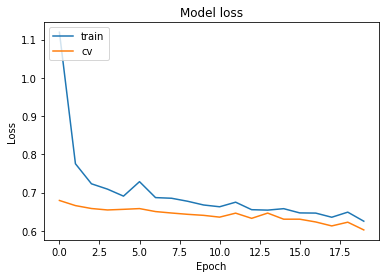

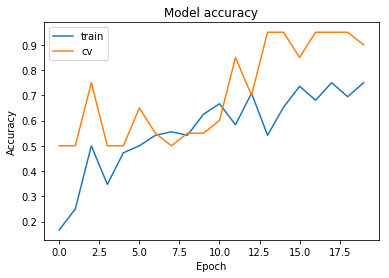

Accuracy sur training: 0.833333
Loss sur training: 0.581006
Accuracy sur validation: 0.900000
Loss sur validation: 0.602383


In [0]:
plt.plot(history_ex1b.history['loss'])
plt.plot(history_ex1b.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'cv'], loc='upper left')
plt.show()
plt.plot(history_ex1b.history['acc'])
plt.plot(history_ex1b.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'cv'], loc='upper left')
plt.show()

loss_ex1b_train, accuracy_ex1b_train = model_ex1b.evaluate_generator(train_generator_ex1b, verbose=0)
print('Accuracy sur training: %f' % (accuracy_ex1b_train))
print('Loss sur training: %f' % (loss_ex1b_train))

loss_ex1b_val, accuracy_ex1b_val = model_ex1b.evaluate_generator(validation_generator_ex1b, verbose=0)
print('Accuracy sur validation: %f' % (accuracy_ex1b_val))
print('Loss sur validation: %f' % (loss_ex1b_val))

## Etape 3: transfer learning

Les étapes à réaliser pour du transfer learning sont les suivantes:

1. Charger la base du modèle et ses poids, sans charger la "tête" du réseau

2. Définir la "tête" du modèle. A minima un classificateur avec le nombre de classes de notre problème

3. On fait tourner le modèle avec la base figée (i.e. trainable = false) pour que les paramètres de notre "tête" commencent à être affinés. Etape parfois facultative mais qui peut permettre d'éviter de diverger

4. On peaufine notre modèle si nécessaire en "relâchant" les dernières couches de notre base (i.e. trainable = true), afin de spécialiser notre réseau sur notre jeu de données. Un compromis à trouver entre précision et temps de calcul ("fine-tunning")

In [0]:
data_generator_ex1tl = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator_ex1tl = data_generator_ex1tl.flow_from_directory(
        'train',
        target_size=(image_size, image_size),
        batch_size=batch_size_ex1,
        class_mode='categorical',
        seed = 1)

validation_generator_ex1tl = data_generator_ex1tl.flow_from_directory(
        'val',
        target_size=(image_size, image_size),
        class_mode='categorical',
        seed = 1)

Found 72 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [0]:
# creation d'un nouveau modèle vide. Ajout séquentiel de couches
model_ex1tl = Sequential()
#n'inclue pas la dernière couche du réseau. A priori on ne veut jamais enlever plus de couches
model_ex1tl.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
# on ajouet une  (softmax: pourcentage de certitude sur des classes)
model_ex1tl.add(Dense(num_classes, activation='softmax'))

# Say not to train first layer (ResNet) model. It is already trained
model_ex1tl.layers[0].trainable = False

94658560/94653016 [==============================] - 3s 0us/step


W0721 13:45:05.155549 140476259895168 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Type de calcul d'erreur

*   for binary_crossentropy: sigmoid activation, scalar target
*   for categorical_crossentropy: softmax activation, one-hot encoded target

Types de classification 

*   binary classification (two target classes)
*   multi-class classification (more than two exclusive targets)
*   multi-label classification (more than two non exclusive targets) 

In [0]:
#opt = SGD(lr=0.005, momentum=0.9)
model_ex1tl.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy']) # categorical_crossentropy  'sgd' ou 'Adam'

In [0]:
history_ex1tl = model_ex1tl.fit_generator(
        train_generator_ex1tl,
        epochs=10,
        steps_per_epoch=train_generator_ex1tl.n/batch_size_ex1,
        validation_data=validation_generator_ex1tl,
        validation_steps=1)

W0721 13:45:06.102162 140476259895168 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
3/3 [==============================] - 8s 3s/step - loss: 0.8337 - acc: 0.5278 - val_loss: 0.5267 - val_acc: 0.7000
Epoch 2/10
3/3 [==============================] - 0s 162ms/step - loss: 0.3918 - acc: 0.8194 - val_loss: 0.3094 - val_acc: 0.9000
Epoch 3/10
3/3 [==============================] - 1s 167ms/step - loss: 0.2014 - acc: 0.9306 - val_loss: 0.2017 - val_acc: 0.9500
Epoch 4/10
3/3 [==============================] - 0s 165ms/step - loss: 0.1376 - acc: 0.9722 - val_loss: 0.1502 - val_acc: 0.9500
Epoch 5/10
3/3 [==============================] - 0s 165ms/step - loss: 0.0881 - acc: 0.9861 - val_loss: 0.1272 - val_acc: 0.9500
Epoch 6/10
3/3 [==============================] - 0s 162ms/step - loss: 0.0482 - acc: 1.0000 - val_loss: 0.1056 - val_acc: 0.9500
Epoch 7/10
3/3 [==============================] - 0s 165ms/step - loss: 0.0381 - acc: 1.0000 - val_loss: 0.1050 - val_acc: 0.9500
Epoch 8/10
3/3 [==============================] - 0s 163ms/step - loss: 0.0203 - acc: 1.0000 

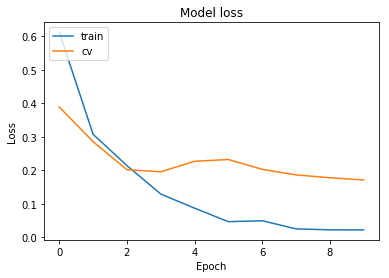

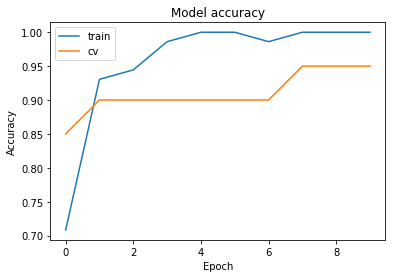

Accuracy sur training: 0.972222
Loss sur training: 0.054157
Accuracy sur validation: 0.950000
Loss sur validation: 0.171036


In [0]:
plt.plot(history_ex1tl.history['loss'])
plt.plot(history_ex1tl.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'cv'], loc='upper left')
plt.show()
plt.plot(history_ex1tl.history['acc'])
plt.plot(history_ex1tl.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'cv'], loc='upper left')
plt.show()

loss_ex1tl_train, accuracy_ex1tl_train = model_ex1tl.evaluate_generator(train_generator_ex1tl, verbose=0)
print('Accuracy sur training: %f' % (accuracy_ex1tl_train))
print('Loss sur training: %f' % (loss_ex1tl_train))

loss_ex1tl_train, accuracy_ex1tl_train = model_ex1tl.evaluate_generator(validation_generator_ex1tl, verbose=0)
print('Accuracy sur validation: %f' % (accuracy_ex1tl_train))
print('Loss sur validation: %f' % (loss_ex1tl_train))

# Exercice 2 - Cracks

## Etape 1: importer les données

In [0]:
%cd /content/atelier/ex2 - cracks

!unzip Cracks

/content/atelier/ex2 - cracks
Archive:  Cracks.zip
   creating: train/
   creating: train/Crack/
  inflating: train/Crack/1.jpg       
  inflating: train/Crack/100.jpg     
  inflating: train/Crack/1003.jpg    
  inflating: train/Crack/1004.jpg    
  inflating: train/Crack/1005.jpg    
  inflating: train/Crack/1006.jpg    
  inflating: train/Crack/1007.jpg    
  inflating: train/Crack/1008.jpg    
  inflating: train/Crack/1009.jpg    
  inflating: train/Crack/101.jpg     
  inflating: train/Crack/1015.jpg    
  inflating: train/Crack/1016.jpg    
  inflating: train/Crack/1019.jpg    
  inflating: train/Crack/102.jpg     
  inflating: train/Crack/1020.jpg    
  inflating: train/Crack/1025.jpg    
  inflating: train/Crack/1026.jpg    
  inflating: train/Crack/1027.jpg    
  inflating: train/Crack/1028.jpg    
  inflating: train/Crack/103.jpg     
  inflating: train/Crack/1030.jpg    
  inflating: train/Crack/1032.jpg    
  inflating: train/Crack/1038.jpg    
  inflating: train/Crack/1039

## Etape 2: visualiser les données

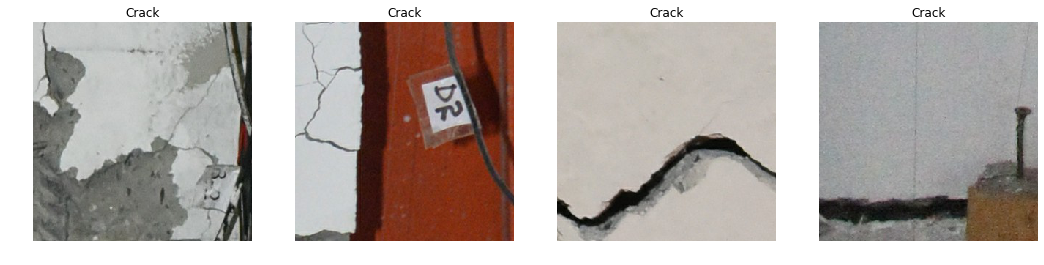

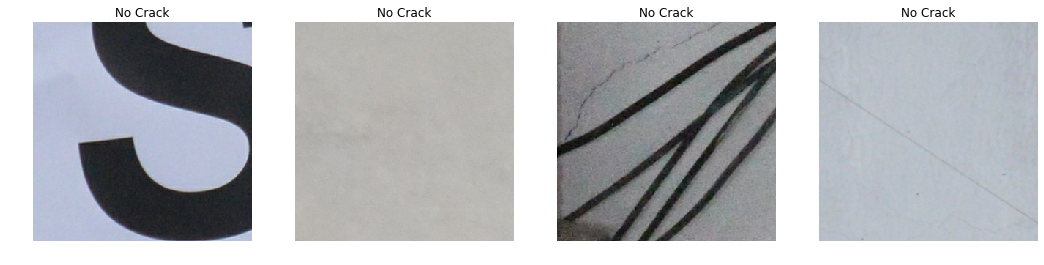

In [0]:
im_liste_crack = [1, 408, 894, 1136]
im_liste_nocrack = [436, 725, 1124, 1238]

#pour voir les données de type "crack"

plt.figure(figsize=(18,18))
for i in range(0,4):
  plt.subplot(1,4,i+1)
  plt.imshow(mpimg.imread('./train/Crack/' + str(im_liste[i]) + '.jpg'))
  plt.title('Crack')
  plt.axis('off')
  
#pour voir les données de type "no crack"
plt.figure(figsize=(18,18))  
for i in range(0,4):
  plt.subplot(1,4,i+1)
  plt.imshow(mpimg.imread('./train/No Crack/' + str(im_liste_nocrack[i]) + '.jpg'))
  plt.title('No Crack')
  plt.axis('off')

## Etape 3: un premier modèle avec convolution
Reseau de neurone convolutionnel ou convNet ou CNN

In [0]:
image_size = 224
num_classes = 2 # "crack" ou "no crack" 
batch_size_ex2b = 24 # traitement des images par lot de 24 

In [0]:
#nous allons utiliser un générateur

data_generator_ex2b = ImageDataGenerator(rescale=1/255)

train_generator_ex2b = data_generator_ex2b.flow_from_directory(
        'train',
        target_size=(image_size, image_size),
        batch_size=batch_size_ex2b,
        class_mode='categorical')

validation_generator_ex2b = data_generator_ex2b.flow_from_directory(
        'val',
        target_size=(image_size, image_size),
        class_mode='categorical')

Found 1296 images belonging to 2 classes.
Found 132 images belonging to 2 classes.


In [0]:
model_ex2b = tf.keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dense(num_classes, activation='softmax')   
])
model_ex2b.summary()
model_ex2b.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 128)      

In [0]:
history_ex2b = model_ex2b.fit_generator(
        train_generator_ex2b,
        epochs=10,
        steps_per_epoch=train_generator_ex2b.n/batch_size_ex2,
        validation_data=validation_generator_ex2b,
        validation_steps=1)

Epoch 1/10
54/54 [==============================] - 6s 118ms/step - loss: 0.6939 - acc: 0.5108 - val_loss: 0.7114 - val_acc: 0.4062
Epoch 2/10
54/54 [==============================] - 3s 61ms/step - loss: 0.6889 - acc: 0.5448 - val_loss: 0.7002 - val_acc: 0.4062
Epoch 3/10
54/54 [==============================] - 4s 71ms/step - loss: 0.6821 - acc: 0.5748 - val_loss: 0.7239 - val_acc: 0.4062
Epoch 4/10
54/54 [==============================] - 4s 71ms/step - loss: 0.6810 - acc: 0.5586 - val_loss: 0.7029 - val_acc: 0.4062
Epoch 5/10
54/54 [==============================] - 4s 71ms/step - loss: 0.6736 - acc: 0.5802 - val_loss: 0.7278 - val_acc: 0.4062
Epoch 6/10
54/54 [==============================] - 4s 69ms/step - loss: 0.6711 - acc: 0.5887 - val_loss: 0.6750 - val_acc: 0.5938
Epoch 7/10
54/54 [==============================] - 4s 69ms/step - loss: 0.6660 - acc: 0.6003 - val_loss: 0.6797 - val_acc: 0.5625
Epoch 8/10
54/54 [==============================] - 4s 69ms/step - loss: 0.6617 - 

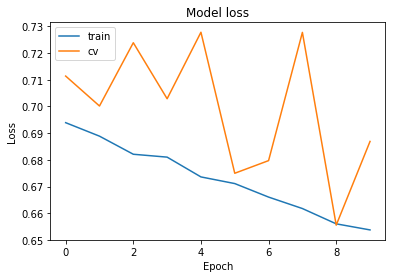

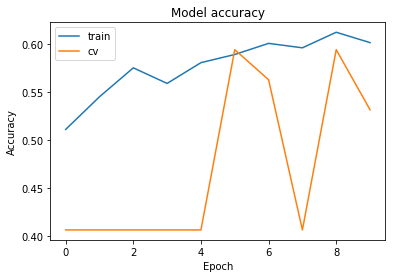

Accuracy sur training: 0.627315
Loss sur training: 0.646377
Accuracy sur validation: 0.560606
Loss sur validation: 0.677202


In [0]:
plt.plot(history_ex2b.history['loss'])
plt.plot(history_ex2b.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'cv'], loc='upper left')
plt.show()
plt.plot(history_ex2b.history['acc'])
plt.plot(history_ex2b.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'cv'], loc='upper left')
plt.show()

loss_ex2b_train, accuracy_ex2b_train = model_ex2b.evaluate_generator(train_generator_ex2b, verbose=0)
print('Accuracy sur training: %f' % (accuracy_ex2b_train))
print('Loss sur training: %f' % (loss_ex2b_train))

loss_ex2b_val, accuracy_ex2b_val = model_ex2b.evaluate_generator(validation_generator_ex2b, verbose=0)
print('Accuracy sur validation: %f' % (accuracy_ex2b_val))
print('Loss sur validation: %f' % (loss_ex2b_val))

## Etape 4 : principe de fonctionnement du transfer learning

Les étapes à réaliser pour du transfer learning sont les suivantes:

1. Charger la base du modèle et ses poids, sans charger la "tête" du réseau

2. Définir la "tête" du modèle. A minima un classificateur avec le nombre de classes de notre problème

3. On fait tourner le modèle avec la base figée (i.e. trainable = false) pour que les paramètres de notre "tête" commencent à être affinés. Etape parfois facultative mais qui peut permettre d'éviter de diverger

4. On peaufine notre modèle si nécessaire en "relâchant" les dernières couches de notre base (i.e. trainable = true), afin de spécialiser notre réseau sur notre jeu de données. Un compromis à trouver entre précision et temps de calcul ("fine-tunning")

In [0]:
batch_size_ex2tl = 8

In [0]:
data_generator_ex2tl = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator_ex2tl = data_generator_ex2tl.flow_from_directory(
        'train',
        target_size=(image_size, image_size),
        batch_size=batch_size_ex2tl,
        class_mode='categorical')

validation_generator_ex2tl = data_generator_ex2tl.flow_from_directory(
        'val',
        target_size=(image_size, image_size),
        class_mode='categorical')

Found 1296 images belonging to 2 classes.
Found 132 images belonging to 2 classes.


In [0]:
# creation d'un nouveau modèle vide. Ajout séquentiel de couches
model_ex2tl = Sequential()
#n'inclue pas la dernière couche du réseau. A priori on ne veut jamais enlever plus de couches
model_ex2tl.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
# on ajouet une  (softmax: pourcentage de certitude sur des classes)
model_ex2tl.add(Dense(512, activation='relu'))
model_ex2tl.add(Dropout(0.5))
model_ex2tl.add(Dense(512, activation='relu'))
model_ex2tl.add(Dropout(0.5))
model_ex2tl.add(Dense(num_classes, activation='softmax'))

# Say not to train first layer (ResNet) model. It is already trained
model_ex2tl.layers[0].trainable = False

94658560/94653016 [==============================] - 1s 0us/step


W0721 12:52:53.443932 140203955328896 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Type de calcul d'erreur

*   for binary_crossentropy: sigmoid activation, scalar target
*   for categorical_crossentropy: softmax activation, one-hot encoded target

Types de classification 

*   binary classification (two target classes)
*   multi-class classification (more than two exclusive targets)
*   multi-label classification (more than two non exclusive targets) 



In [0]:
#opt = SGD(lr=0.005, momentum=0.9)
model_ex2tl.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy']) # categorical_crossentropy  'sgd' ou 'Adam'

In [0]:
history_ex2tl = model_ex2tl.fit_generator(
        train_generator_ex2tl,
        epochs=6, 
        steps_per_epoch=train_generator_ex2tl.n/batch_size_ex2tl,
        validation_data=validation_generator_ex2tl,
        validation_steps=1)

W0721 12:52:54.978548 140203955328896 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/6
162/162 [==============================] - 23s 142ms/step - loss: 0.7945 - acc: 0.7415 - val_loss: 1.3800 - val_acc: 0.5312
Epoch 2/6
162/162 [==============================] - 16s 96ms/step - loss: 0.3947 - acc: 0.8511 - val_loss: 1.0639 - val_acc: 0.6250
Epoch 3/6
162/162 [==============================] - 16s 96ms/step - loss: 0.3855 - acc: 0.8426 - val_loss: 0.8571 - val_acc: 0.6250
Epoch 4/6
162/162 [==============================] - 16s 96ms/step - loss: 0.3443 - acc: 0.8526 - val_loss: 0.8206 - val_acc: 0.6875
Epoch 5/6
162/162 [==============================] - 16s 96ms/step - loss: 0.3308 - acc: 0.8665 - val_loss: 0.8912 - val_acc: 0.6562
Epoch 6/6
162/162 [==============================] - 16s 97ms/step - loss: 0.3061 - acc: 0.8688 - val_loss: 1.1664 - val_acc: 0.6562


Epoch 1/10
54/54 [==============================] - 16s 294ms/step - loss: 0.4048 - acc: 0.8287 - val_loss: 1.0921 - val_acc: 0.5000
Epoch 2/10
54/54 [==============================] - 11s 206ms/step - loss: 0.2737 - acc: 0.8866 - val_loss: 1.0658 - val_acc: 0.5625
Epoch 3/10
54/54 [==============================] - 11s 208ms/step - loss: 0.2307 - acc: 0.9190 - val_loss: 1.1126 - val_acc: 0.5938
Epoch 4/10
54/54 [==============================] - 11s 208ms/step - loss: 0.2377 - acc: 0.9074 - val_loss: 1.0419 - val_acc: 0.6250
Epoch 5/10
54/54 [==============================] - 11s 208ms/step - loss: 0.2084 - acc: 0.9213 - val_loss: 0.8798 - val_acc: 0.5938
Epoch 6/10
54/54 [==============================] - 11s 208ms/step - loss: 0.1895 - acc: 0.9205 - val_loss: 1.2267 - val_acc: 0.6250
Epoch 7/10
54/54 [==============================] - 11s 209ms/step - loss: 0.2013 - acc: 0.9213 - val_loss: 1.1847 - val_acc: 0.6250
Epoch 8/10
54/54 [==============================] - 11s 208ms/step - loss: 0.1733 - acc: 0.9383 - val_loss: 1.1266 - val_acc: 0.6250
Epoch 9/10
54/54 [==============================] - 11s 209ms/step - loss: 0.1798 - acc: 0.9298 - val_loss: 1.0521 - val_acc: 0.6250
Epoch 10/10
54/54 [==============================] - 11s 210ms/step - loss: 0.1627 - acc: 0.9367 - val_loss: 0.8890 - val_acc: 0.5938

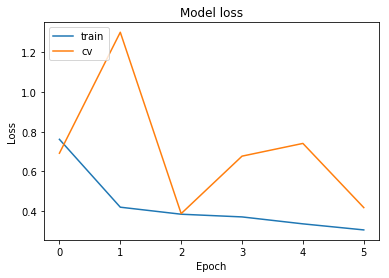

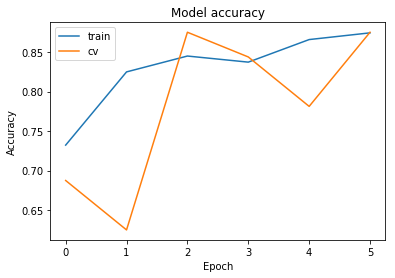

Accuracy sur training: 0.846451
Loss sur training: 0.415004
Accuracy sur validation: 0.757576
Loss sur validation: 0.716007


In [0]:
plt.plot(history_ex2tl.history['loss'])
plt.plot(history_ex2tl.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'cv'], loc='upper left')
plt.show()
plt.plot(history_ex2tl.history['acc'])
plt.plot(history_ex2tl.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'cv'], loc='upper left')
plt.show()

loss_ex2tl_train, accuracy_ex2tl_train = model_ex2tl.evaluate_generator(train_generator_ex2tl, verbose=0)
print('Accuracy sur training: %f' % (accuracy_ex2tl_train))
print('Loss sur training: %f' % (loss_ex2tl_train))

loss_ex2tl_val, accuracy_ex2tl_val = model_ex2tl.evaluate_generator(validation_generator_ex2tl, verbose=0)
print('Accuracy sur validation: %f' % (accuracy_ex2tl_val))
print('Loss sur validation: %f' % (loss_ex2tl_val))

# https://keras.io/getting-started/faq/#why-is-the-training-loss-much-higher-than-the-testing-loss